In [2]:
# loading data from files
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# load csv with pandas
df = pd.read_csv("./datasets/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class']=le.transform(df['class'])
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [24]:
# break into train/test using sklearn
from sklearn.model_selection import train_test_split

features = df.drop('class', axis=1).values
label = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train).type(torch.int64)

X_test = torch.LongTensor(X_test)
y_test = torch.LongTensor(y_test)

#want the labels to be a column rather than a single row
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"X_train.shape {X_train.shape}")
print(f"X_train.type {X_train.dtype}")
print(f"X_test.shape {X_test.shape}")

print(f"y_train.shape {y_train.shape}")
print(f"y_train.dtype {y_train.dtype}")
print(f"y_test.shape {y_test.shape}")


X_train.shape torch.Size([120, 4])
X_train.type torch.float64
X_test.shape torch.Size([30, 4])
y_train.shape torch.Size([120, 1])
y_train.dtype torch.int64
y_test.shape torch.Size([30, 1])


In [26]:
# use pytorch built in Dataset and Dataloader
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('class', axis=1).values
labels = df['class'].values

# use Datatset
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

# wrap it with DataLoader
iris_loader = DataLoader(iris, batch_size=10, shuffle=True)

features, label = next(iter(iris_loader))
print(features.shape)
print(label.shape)

torch.Size([10, 4])
torch.Size([10])


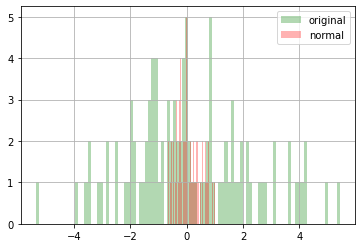

In [42]:
#scale and normalize data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch

r = torch.randn(100)*2

scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(r.reshape(-1,1))

r.tolist()

plt.hist(r.tolist(), bins=100, alpha=.3, color='green', label="original")
plt.hist(scaled.squeeze(), bins=100, alpha=.3, color='red', label="normal")
plt.legend(loc="best")
plt.grid()

In [ ]:
# one-hot encoding of words


In [ ]:
# create sliding window for regression prediction using rnns

In [1]:
# create sliding window for words
